# Model Selection and Bias-Variance Tradeoff

## StatML: Lecture 2

## Prof. James Sharpnack


### LinearRegression.fit

Fit in OLS solves the following, on training set
$$
\hat \beta = (X^\top X)^{-1} X^\top y
$$
where $X,y$ are $n \times p$ and $n$ arrays.

1. Matrix multiply
2. Linear solve:
$$
(X^\top X) \hat \beta = X^\top y
$$

### O notation

- Sequence $A_n = O(B_n)$ if there is an M > 0 such that $A_n < M B_n$ for $n$ large enough.
- An algorithm takes $O(A_n)$ time if the number of basic operations (floating point arithmetic) to run is $O(A_n)$. 

The for loop to compute
$$\sum_{i=1}^n i$$
takes $O(n)$ time while computing
$$n (n + 1)/2$$
takes $O(1)$ time.

### LinearRegression.fit

1. Matrix mult complexity
$$
(X^\top X)_{j,k} = \sum_{i=1}^n X_{i,j} X_{i,k} 
$$
sum is $O(n)$, full complexity is $O(p^2 n)$ time.

1. Matrix solve - Cholesky decomposition - computational complexity O(p^3) time
1. Total complexity of fit: $O(n p^2 + p^3)$.


### LinearRegression.predict

Given $x_{n+1}$,
$$
\hat f(x_{n+1}) = x_{n+1}^\top \hat \beta = \hat \beta_0 + \sum_{j=1}^n \hat \beta_j x_{n+1,j}.
$$
is $O(p)$ time.

#### Conclusions
1. Predict is fast: $O(p)$
2. Fit is slow: $O(np^2)$ (if $n > p$)
3. $X^\top X$ needs to be invertible (impossible if $p > n$!)
4. $\hat f$ is linear (restrictive)

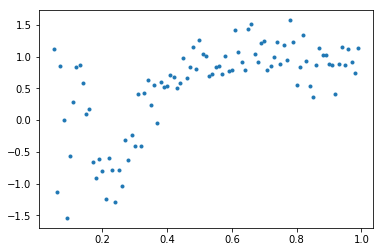

In [119]:
## Nonlinear example

x = np.arange(.05,1,.01)
y = np.sin(1/x) + np.random.normal(0,.25,len(x))
plt.plot(x,y,'.')

### K nearest neighbors

Given a metric (d), the K-nearest neighbors of $x$ in $x_1,\ldots,x_n$ is $x_{j_1},\ldots,x_{j_K}$ such that
$$
d(x,x_{j_1}) \le d(x,x_{j_2}) \le \ldots
$$
- KNN methods fit a local model for predicting $x$ using the KNNs
- Intuition is that $Y|X=x$ is approximately iid with $Y|X=x_{j_k}$
- For regression,
$$
\hat f_K(x) = \frac 1K \sum_{k=1}^K y_{j_k}.
$$

In [130]:
## Fit K neighbors regression
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = x.reshape(-1,1)
knn.fit(X,y)
y_pred = knn.predict(X)

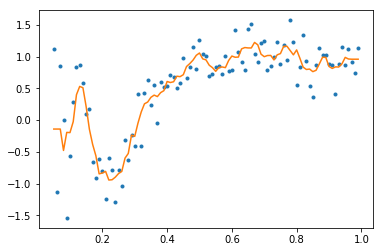

In [131]:
## 5-nearest neighbors regression
plt.plot(x,y,'.')
plt.plot(x,y_pred)

### K nearest neighbors.fit

- Naive implementation, save the data
- Better is sort or arrange the data
 - in 1D sort makes nearest neighbor lookup fast!
 - sort takes $O(n \log n)$ time
 - in higher dimensions there is specialized data structions (KDTree)

### K nearest neighbors.predict

- For each new point find the KNNs
 - if unsorted then this can take $O(n)$ time for each new point - compare to $O(p)$ for OLS
 - if sorted then this can take $O(\log n)$ time (different for $>1$D)
- Take average of $K$ neighbors is fast

### Tuning parameter
- K is a tuning parameter
- Know how to evaluate - use test error
- Treat each K as resulting in a different model

# Stop

In [39]:
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
## Reading in data - using pandas!
datapath = "../../data/"
filename = datapath + 'winequality-red.csv'
wine = pd.read_csv(filename,delimiter=';')

In [81]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [151]:
## Preparing training/test data

y = wine['quality'].values
X = wine.drop(['quality'],axis=1).values
test_size = .33
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size = .33)

In [152]:
X_tr.shape, X_te.shape # checking

((1071, 11), (528, 11))

### Exercise 2.1

1. Look at [the documentation for StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) notice that there is the `fit` method to be applied to training data and the `transform` method for the test data.  Fit and transform an instance on the wine data training Xs.
2. Fit the following models on the training data: LinearRegression with intercept, KNN for a large range of K.  You can store the trained models in a list.
3. Create a custom model class (based on the KNeighborsRegressor) that selects columns 1,10 from the dataset and fits KNN only on this subset of columns.  Give it a `fit` and `predict` method that has the same input and output as that of KNeighborsRegressor.  Fit this as well for a large range of K.
4. Use each model to predict the test data and calculate the mean square error.  Plot this as a function of K for each KNN method and compare to linear regression.

In [ ]:
## Answer to 2.1

## TRAINING - DON'T TOUCH Y_te (better not to touch X_te)

## Preprocessing

stand = preprocessing.StandardScaler()
stand.fit(X_tr)
X_tr = stand.transform(X_tr)

In [154]:
## Fitting OLS and KNN

lr = linear_model.LinearRegression()
lr.fit(X_tr,y_tr)

knns = []
neighbors_K = np.arange(1,241,2)
M = len(neighbors_K)
for k in neighbors_K:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    knns.append(knn)
    
models = [lr] + knns

In [155]:
SEL_COLS = [1,10] # acid volatility, alcohol

class WinePredictor:
    """
    Custom predictor that selects vars 1 and 10 and performs knn
    """
    def __init__(self,n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
        
    def fit(self, X_tr, y_tr):
        X_sub = X_tr[:,SEL_COLS]
        self.knn.fit(X_sub,y_tr)
        
    def predict(self,X_te):
        X_sub = X_te[:,SEL_COLS]
        return self.knn.predict(X_sub)
    
## Can do this more cleanly with Class inheritance (maybe a future lecture)

In [156]:
## Fitting wine predictor

wine_knns = []

for k in neighbors_K:
    knn = WinePredictor(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    wine_knns.append(knn)
    
models = models + wine_knns

In [157]:
## TESTING - DON'T TOUCH MODELS

## transformations

X_te = stand.transform(X_te)

## prediction

MSEs = []
for m in models:
    y_pred = m.predict(X_te)
    MSEs.append(metrics.mean_squared_error(y_te,y_pred))

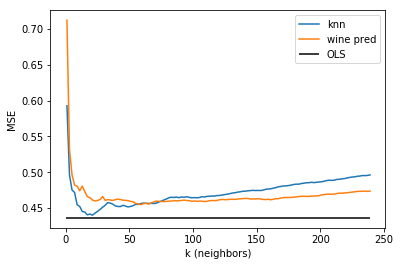

In [158]:
plt.plot(neighbors_K,MSEs[1:M+1],label='knn')
plt.plot(neighbors_K,MSEs[M+1:],label='wine pred')
plt.hlines(MSEs[0],0,neighbors_K[-1],label='OLS')
plt.xlabel('k (neighbors)')
plt.ylabel('MSE')
plt.legend()

# Stop

### Bias-Variance tradeoff for square error loss
#### (STA 251 notes scribed by Jianing Fan, Yuhan Ning)

- square error loss
- any predictor $f$

Risk is
$$
R(f) = \mathbb E (Y - f(X))^2.
$$

\begin{align*}
    & \eta(x) = \mathbb{E}[Y|X=x] \quad \text{minimizes}\, R(f),\\
    & R(\eta) = \mathbb{E}(Y-\eta(X))^2=: R^{*}.
\end{align*}

\begin{align*}
    R(f) &= \mathbb{E}(Y-f(X))^2 = \mathbb{E}(Y-\eta(X)+\eta(X)-f(X))^2\\
    &= \mathbb{E}(Y-\eta(X))^2+\mathbb{E}(\eta(X)-f(X))^2+2\mathbb{E}(Y-\eta(X))(\eta(X)-f(X))\\
    &=R^{*}+\mathbb{E}(\eta(X)-f(X))^2+2\mathbb{E}(Y-\eta(X))(\eta(X)-f(X)),
\end{align*}

\begin{align*}
    \mathbb{E}(Y-\eta(X))(\eta(X)-f(X)) &= \mathbb{E}\big[\mathbb{E}[(Y-\eta(X))(\eta(X)-f(X))|X]\big]\\
    &= \mathbb{E}\big[\mathbb{E}[(Y-\eta(X))|X](\eta(X)-f(X))\big]\\
    &= \mathbb{E}\big[\mathbb{E}[(Y-\mathbb{E}[Y|X])|X](\eta(X)-f(X))\big]\\
    &=0.
\end{align*}

$$\mathbb{E}(\hat{f}(X)-\eta(X))^2 = \mathbb{E}\left[ \left[ \hat{f}(X)-\eta(X))^2 | X \right] \right]$$ 
So let's fix the predicted point $X = x$.

Notice that $f$ is random ($\hat{f}$) because it comes from training data.  Let's condition on the training X's ($X_{[n]}$)...

\begin{align*}
    \mathbb{E}(\hat{f}(x)-\eta(x))^2 &= \mathbb{E}(\hat{f}(x)-\mathbb{E}[\hat{f}(x)|X_{[n]}])^2+\mathbb{E}(\mathbb{E}[\hat{f}(x)|X_{[n]}]-\eta(x))^2+ (\text{cross-term}=0)\\
    &= \mathbb{E}(\hat{f}(x)-\mathbb{E}[\hat{f}(x)|X_{[n]}])^2+\mathbb{E}(\mathbb{E}[\hat{f}(x)|X_{[n]}]-\eta(x))^2\\
    &= \mathbb E\left[(\hat{f}(x)-\mathbb E[\hat f(x) | X_{[n]}])^2 \right] + \mathbb{E} \left[ \left( \mathbb E[\hat{f}(x)|X_{[n]}]-\eta(x)\right)^2 \right]\\
    &= \mathbb{E}[\text{Var}(\hat{f}(x)|X_{[n]})]+\mathbb{E}[\text{Bias}^2(\hat{f}(x)|X_{[n]})],
\end{align*}

where $\text{Bias}(\hat{f}(x)|X_{[n]}) = \mathbb{E}[\hat{f}(x)|X_{[n]}] -\eta(x)$.

$$
R(\hat{f}) = R^* + \mathbb{E}[\text{Bias}^2(\hat{f}(X)|X_{[n]})+\text{Var}(\hat{f}(X)|X_{[n]})].
$$
Risk is irreducible error + bias + variance

### Exercise 2.2

Recall KNN regression:
$$
\hat f_K(x) = \frac 1K \sum_{k=1}^K y_{j_k(x)}.
$$
where $j_k(x)$ is the index of the kth nearest neighbor of $x$ in $X_1,\ldots,X_n$. (Consider $x$ fixed.)

Assume homoscedasticity: $\text{Var}(y_i) = \sigma^2$ for all i.
1. Derive a simple expression for $\text{Var}(\hat{f}(x)| X_{[n]})$
2. Derive a simple expression for $\text{Bias}(\hat{f}(x)|X_{[n]})$
3. What do you expect the tradeoff to be between these as $K$ gets large?

$$\text{Var}(\hat{f}(x)| X_{[n]}) = \frac{1}{K^2} \sum_{k=1}^K \text{Var}(y_{j_k(x)}| X_{[n]}) = \frac{\sigma^2}{K}$$

$$\text{Bias}(\hat{f}(x)|X_{[n]}) = \mathbb{E}[\hat{f}(x)|X_{[n]}]-\eta(x) = \frac 1K \sum_{k=1}^K \eta(X_{j_k(x)}) - \eta(x)$$

1. We can expect that the conditional variance decreases,
2. The bias may increase because $\eta(X_{j_k(x)})$ may be quite different from $\eta(x)$ as $X_{j_k(x)}$ is far from $x$.

### BV tradeoff for KNN

- low K
 - high variance
 - low bias
- high K
 - low variance
 - high bias

In [167]:
## Fit K neighbors regression
x = np.arange(.05,1,.01)
y = np.sin(1/x) + np.random.normal(0,.25,len(x))
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
X = x.reshape(-1,1)
knn.fit(X,y)
y_pred = knn.predict(X)

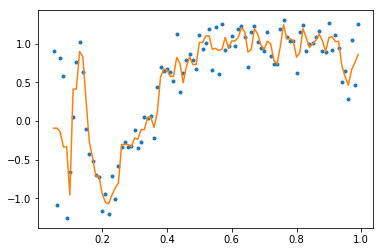

In [168]:
## 2-nearest neighbors regression
plt.plot(x,y,'.')
plt.plot(x,y_pred)

In [169]:
knn = neighbors.KNeighborsRegressor(n_neighbors=21)
X = x.reshape(-1,1)
knn.fit(X,y)
y_pred = knn.predict(X)

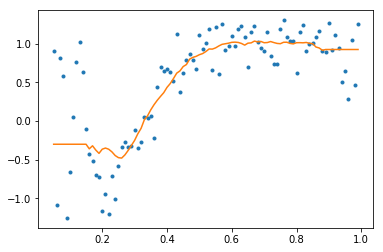

In [170]:
## 21-nearest neighbors regression
plt.plot(x,y,'.')
plt.plot(x,y_pred)

Text(0, 0.5, 'MSE')

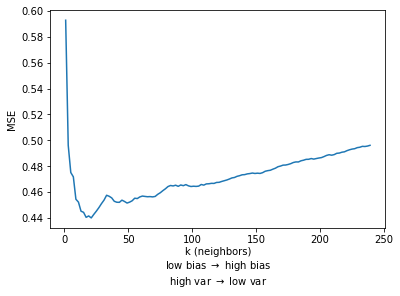

In [180]:
plt.plot(neighbors_K,MSEs[1:M+1],label='knn')
plt.xlabel(r"""k (neighbors)
low bias $\rightarrow$ high bias
high var $\rightarrow$ low var""")
plt.ylabel('MSE')